In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [72]:
Genetics_dataset = pd.read_csv("train.csv")
df = Genetics_dataset.copy()

In [73]:
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [74]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [75]:
df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Location of Institute", "Institute Name", "Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"], inplace=True, axis=1)

In [76]:
print(df["Genes in mother's side"].value_counts())

Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64


In [77]:
print(df["Inherited from father"].value_counts())

No     13133
Yes     8644
Name: Inherited from father, dtype: int64


In [78]:
for c in df.columns:
    if df[c].dtype == object:
        print("\n", df[c].value_counts())


 Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64

 No     13133
Yes     8644
Name: Inherited from father, dtype: int64

 Yes    10647
No      8626
Name: Maternal gene, dtype: int64

 No     12508
Yes     9575
Name: Paternal gene, dtype: int64

 Alive       11083
Deceased    11000
Name: Status, dtype: int64

 Normal (30-60)    10065
Tachypnea          9869
Name: Respiratory Rate (breaths/min), dtype: int64

 Normal         10187
Tachycardia     9783
Name: Heart Rate (rates/min, dtype: int64

 Yes    19958
Name: Parental consent, dtype: int64

 Low     10040
High     9877
Name: Follow-up, dtype: int64

 Ambiguous    6695
Male         6666
Female       6549
Name: Gender, dtype: int64

 Yes              5106
No record        5008
Not available    4986
No               4844
Name: Birth asphyxia, dtype: int64

 Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

 

In [79]:
print(df["Birth asphyxia"].value_counts())

Yes              5106
No record        5008
Not available    4986
No               4844
Name: Birth asphyxia, dtype: int64


In [80]:
df["Birth asphyxia"] = df["Birth asphyxia"].replace("No record",np.NaN)
df["Birth asphyxia"] = df["Birth asphyxia"].replace("Not available",np.NaN)

In [81]:
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)

In [82]:
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("-",np.NaN)

In [83]:
df["H/O substance abuse"] = df["H/O substance abuse"].replace("Not applicable",np.NaN)
df["H/O substance abuse"] = df["H/O substance abuse"].replace("-",np.NaN)

In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [86]:
print(df.describe().T)

                                                    count       mean  \
Patient Age                                       20656.0   6.974148   
Blood cell count (mcL)                            22083.0   4.898871   
Mother's age                                      16047.0  34.526454   
Father's age                                      16097.0  41.972852   
No. of previous abortion                          19921.0   2.003062   
White Blood cell count (thousand per microliter)  19935.0   7.486224   

                                                        std        min  \
Patient Age                                        4.319475   0.000000   
Blood cell count (mcL)                             0.199663   4.092727   
Mother's age                                       9.852598  18.000000   
Father's age                                      13.035501  20.000000   
No. of previous abortion                           1.411919   0.000000   
White Blood cell count (thousand per microliter)   

In [87]:
print("Correlation:")
print(df.corr())

Correlation:
                                                  Patient Age  \
Patient Age                                          1.000000   
Blood cell count (mcL)                               0.010819   
Mother's age                                        -0.007588   
Father's age                                        -0.009797   
No. of previous abortion                            -0.007281   
White Blood cell count (thousand per microliter)    -0.008489   

                                                  Blood cell count (mcL)  \
Patient Age                                                     0.010819   
Blood cell count (mcL)                                          1.000000   
Mother's age                                                   -0.007163   
Father's age                                                    0.003303   
No. of previous abortion                                       -0.005995   
White Blood cell count (thousand per microliter)               -0.001037   

/var/folders/05/rqx0t5b55mg00sfbld1y5k_r0000gn/T/ipykernel_72416/1075721666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [88]:
print("Covariance:")
print(df.cov())

Covariance:
                                                  Patient Age  \
Patient Age                                         18.657865   
Blood cell count (mcL)                               0.009323   
Mother's age                                        -0.322647   
Father's age                                        -0.551714   
No. of previous abortion                            -0.044372   
White Blood cell count (thousand per microliter)    -0.097218   

                                                  Blood cell count (mcL)  \
Patient Age                                                     0.009323   
Blood cell count (mcL)                                          0.039865   
Mother's age                                                   -0.014055   
Father's age                                                    0.008566   
No. of previous abortion                                       -0.001692   
White Blood cell count (thousand per microliter)               -0.000550   


/var/folders/05/rqx0t5b55mg00sfbld1y5k_r0000gn/T/ipykernel_72416/3088220116.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov())


/var/folders/05/rqx0t5b55mg00sfbld1y5k_r0000gn/T/ipykernel_72416/1251179888.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


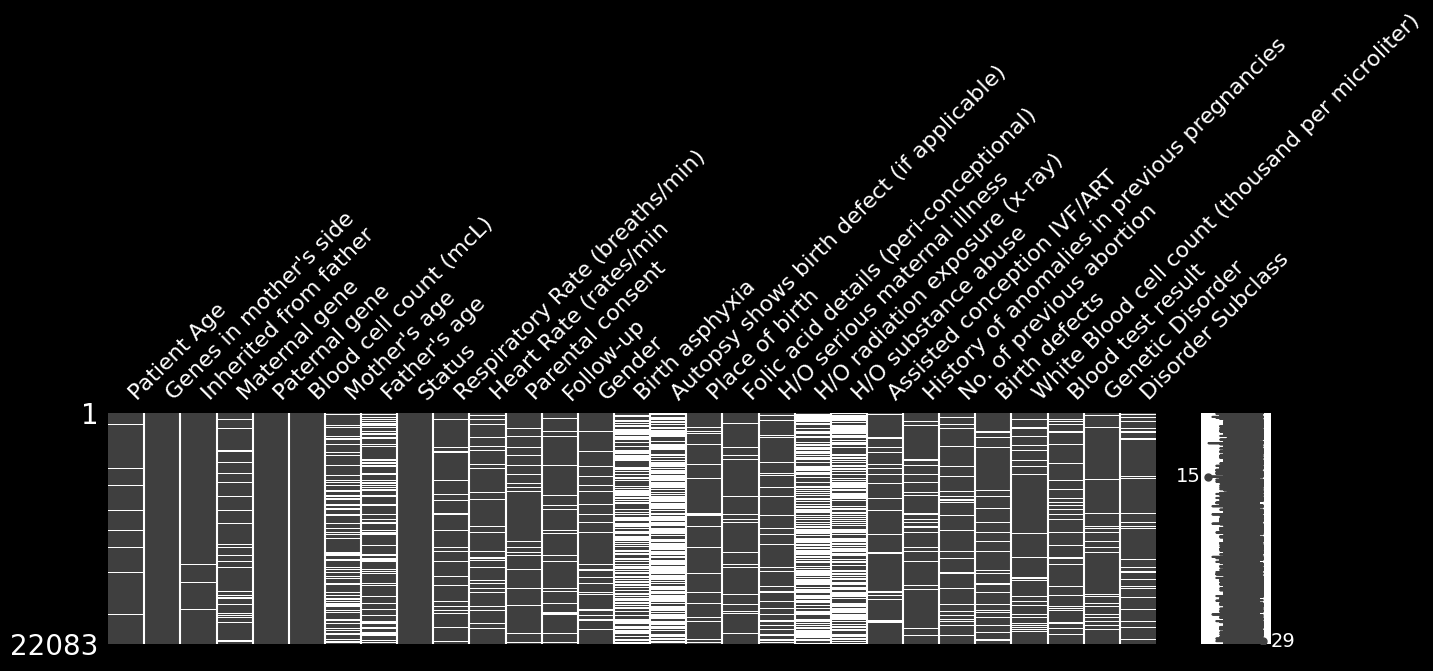

In [89]:
plt.style.use("dark_background")
msno.matrix(df,figsize=(15,3))
plt.tight_layout()
plt.show()

/var/folders/05/rqx0t5b55mg00sfbld1y5k_r0000gn/T/ipykernel_72416/3813108368.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


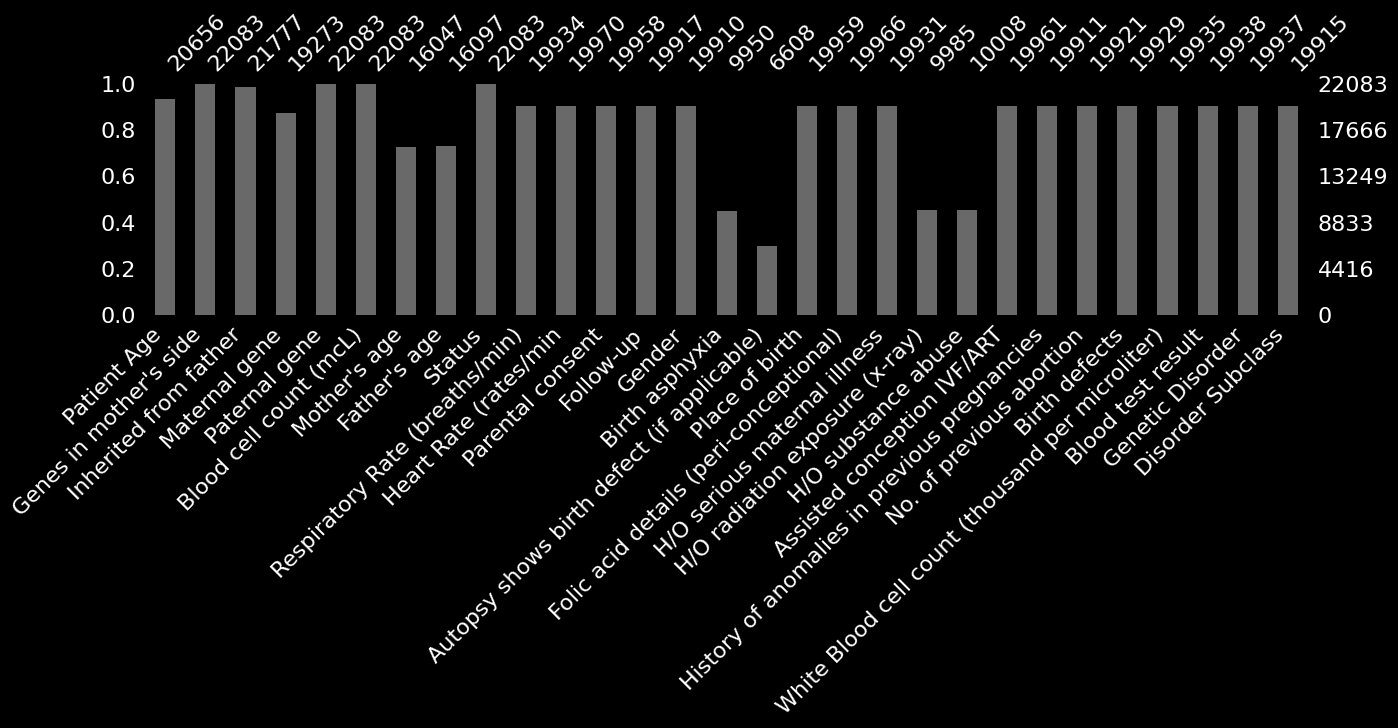

In [90]:
msno.bar(df,figsize=(15,3))
plt.tight_layout()
plt.show()